In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

aa_index = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}
aa_list = ["ALA", "CYS", "ASP", "GLU", "PHE", "GLY", "HIS", "ILE", "LYS", "LEU", "MET", "ASN", "PRO", "GLN", "ARG", "SER", "THR", "VAL", "TRP", "TYR"]


# this function helps you to convert the listed data in dataframe into a list (plddt etc.)
def string_to_float_list(string):
    return [float(i) if i!='None' else None for i in string.split(',') ]

# this function helps you to convert the sequence data in dataframe into a list (secondary structure etc.)
def ss_string_to_list(string):
    return [float(i) for i in string.strip('][').split(',')]

def merge_list(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

def filter_function(df):
    filter_list = []
    for i in range(len(df)):
        if df['model_1_ptm_avg_plddt'][i] >= 70 and df['model_2_ptm_avg_plddt'][i] > 70 and df['model_3_ptm_avg_plddt'][i] > 70 and df['model_4_ptm_avg_plddt'][i] > 70 and df['model_5_ptm_avg_plddt'][i] >= 70:
            filter_list.append(True)
        else:
            filter_list.append(False)
    return filter_list

In [2]:
# feature in dataframe:
# ID, name, sequence, sequence_length, structure_avail, [model_name]_avg_plddt
# with model name: disulfide_bond, hydrogen_bond, salt_bridge, surface, SASA, secondary_structure, chirality, phi_angle, psi_angle, omega_angle, plddt

In [3]:
# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)

In [4]:
# read data
df_A501 = pd.read_csv('A501_results.tsv', sep='\t')
df_3DAC = pd.read_csv('3DAC_results.tsv', sep='\t')

df_list = [df_A501,df_3DAC]
tick_list = ["A501","3DAC"]
color_list = ["tab:red","tab:blue"]
cmap_list = ["Reds","Blues"]


# Calculate secondary structure percentage
for j in range(len(df_list)):

    ss_H_list = []
    ss_S_list = []
    ss_L_list = []
    for i in range(df_list[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list[j]["secondary_structure_relaxed_model_3_ptm"][i])
        ss_H_list.append(ss_H)
        ss_S_list.append(ss_S)
        ss_L_list.append(ss_L)
    df_list[j]["ss_H"] = ss_H_list
    df_list[j]["ss_S"] = ss_S_list
    df_list[j]["ss_L"] = ss_L_list

print("A501 removed:",df_A501.shape[0]-sum(filter_function(df_A501)))
print("3DAC removed:",df_3DAC.shape[0]-sum(filter_function(df_3DAC)))


A501 removed: 158
3DAC removed: 304


In [127]:
def count_wrong_chirality(df,model_name):
    count = [[0,0] for i in range(20)]    # 0: wrong, 1: total
    for i in range(df.shape[0]):
        for j in range(df["sequence_length"][i]):
            index_j = len(df["sequence"][i][:j].replace("G",""))
            if index_j < len(df["chirality_"+model_name][i]):
                if df["chirality_"+model_name][i][index_j] == "R" and df["sequence"][i][j] != "G" and df["sequence"][i][j] != "C":
                    count[aa_index[df["sequence"][i][j]]][0] += 1
                elif df["chirality_"+model_name][i][index_j] == "S" and df["sequence"][i][j] == "C":
                    count[aa_index["C"]][0] += 1
                else:
                    pass
            count[aa_index[df["sequence"][i][j]]][1] += 1
    return count

In [136]:
chirality_result_A501 = [[],[],[],[],[],[],[],[],[],[]]
chirality_result_A501[0] = count_wrong_chirality(df_A501,"relaxed_model_1_ptm")
chirality_result_A501[1] = count_wrong_chirality(df_A501,"relaxed_model_2_ptm")
chirality_result_A501[2] = count_wrong_chirality(df_A501,"relaxed_model_3_ptm")
chirality_result_A501[3] = count_wrong_chirality(df_A501,"relaxed_model_4_ptm")
chirality_result_A501[4] = count_wrong_chirality(df_A501,"relaxed_model_5_ptm")
chirality_result_A501[5] = count_wrong_chirality(df_A501,"unrelaxed_model_1_ptm")
chirality_result_A501[6] = count_wrong_chirality(df_A501,"unrelaxed_model_2_ptm")
chirality_result_A501[7] = count_wrong_chirality(df_A501,"unrelaxed_model_3_ptm")
chirality_result_A501[8] = count_wrong_chirality(df_A501,"unrelaxed_model_4_ptm")
chirality_result_A501[9] = count_wrong_chirality(df_A501,"unrelaxed_model_5_ptm")

In [147]:
chirality_result_3DAC = [[],[],[],[],[],[],[],[],[],[]]
chirality_result_3DAC[0] = count_wrong_chirality(df_3DAC,"relaxed_model_1_ptm")
chirality_result_3DAC[1] = count_wrong_chirality(df_3DAC,"relaxed_model_2_ptm")
chirality_result_3DAC[2] = count_wrong_chirality(df_3DAC,"relaxed_model_3_ptm")
chirality_result_3DAC[3] = count_wrong_chirality(df_3DAC,"relaxed_model_4_ptm")
chirality_result_3DAC[4] = count_wrong_chirality(df_3DAC,"relaxed_model_5_ptm")
chirality_result_3DAC[5] = count_wrong_chirality(df_3DAC,"unrelaxed_model_1_ptm")
chirality_result_3DAC[6] = count_wrong_chirality(df_3DAC,"unrelaxed_model_2_ptm")
chirality_result_3DAC[7] = count_wrong_chirality(df_3DAC,"unrelaxed_model_3_ptm")
chirality_result_3DAC[8] = count_wrong_chirality(df_3DAC,"unrelaxed_model_4_ptm")
chirality_result_3DAC[9] = count_wrong_chirality(df_3DAC,"unrelaxed_model_5_ptm")

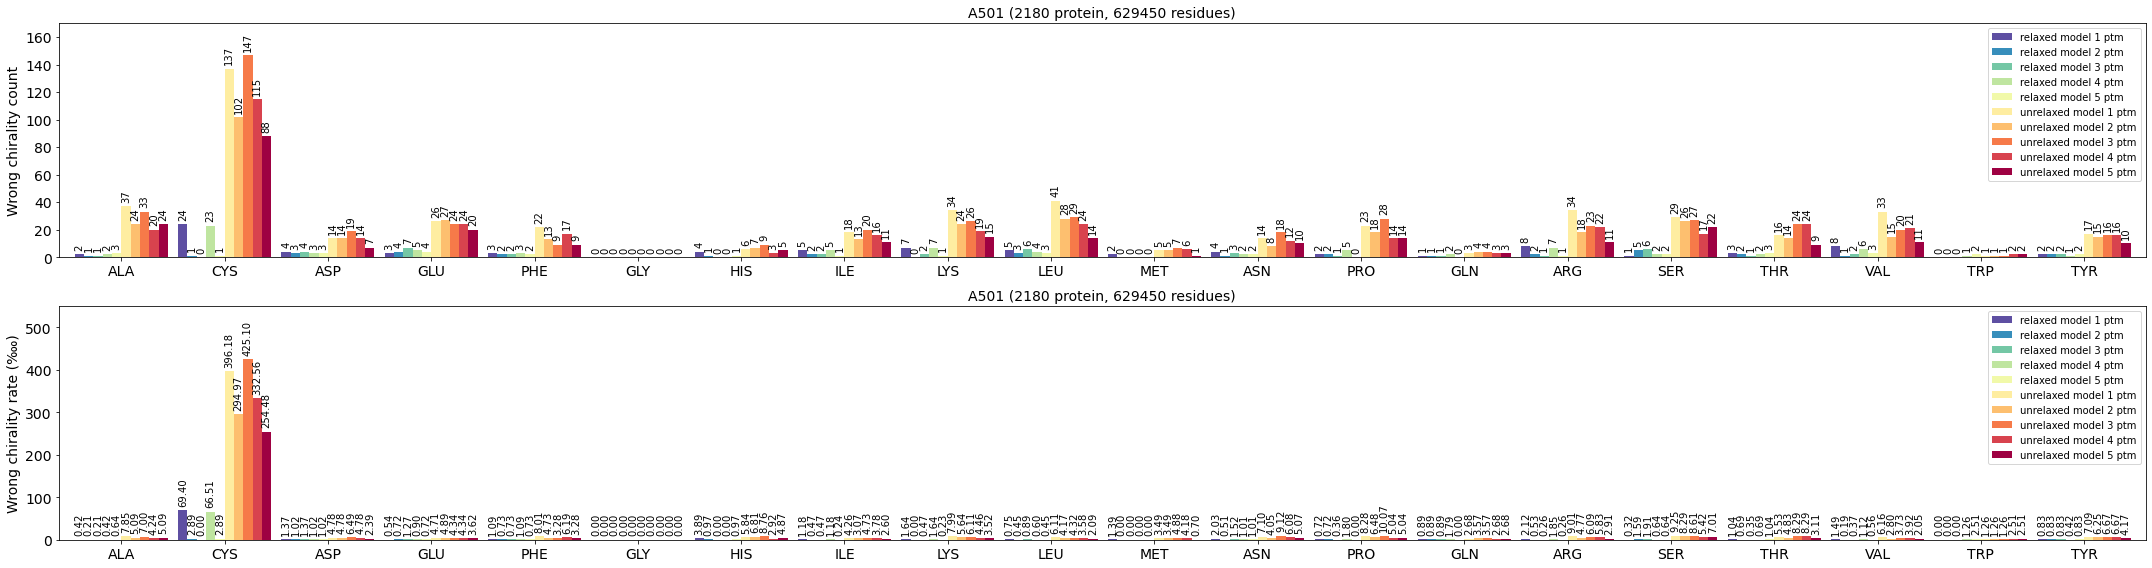

In [197]:
color_list = [plt.cm.Spectral_r(i) for i in np.linspace(0,1,10)]
model_names = ["relaxed model 1 ptm","relaxed model 2 ptm","relaxed model 3 ptm","relaxed model 4 ptm","relaxed model 5 ptm","unrelaxed model 1 ptm","unrelaxed model 2 ptm","unrelaxed model 3 ptm","unrelaxed model 4 ptm","unrelaxed model 5 ptm"]


plt.figure(figsize=(30,8))
plt.subplot(211)
for model_index in range(10):
    wrong_chirality_count = [residue[0] for residue in chirality_result_A501[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+3,str(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("A501 (2180 protein, 629450 residues)",fontsize=14)
plt.ylabel("Wrong chirality count",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,170)
plt.legend(fontsize=10)


plt.subplot(212)
for model_index in range(10):
    wrong_chirality_count = [residue[0]/residue[1]*10000 for residue in chirality_result_A501[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+10,"%.2f"%(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("A501 (2180 protein, 629450 residues)",fontsize=14)
plt.ylabel("Wrong chirality rate (‱)",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,550)
plt.legend(fontsize=10)


plt.tight_layout()
plt.savefig("A501_chirality.png",dpi=300,bbox_inches="tight")

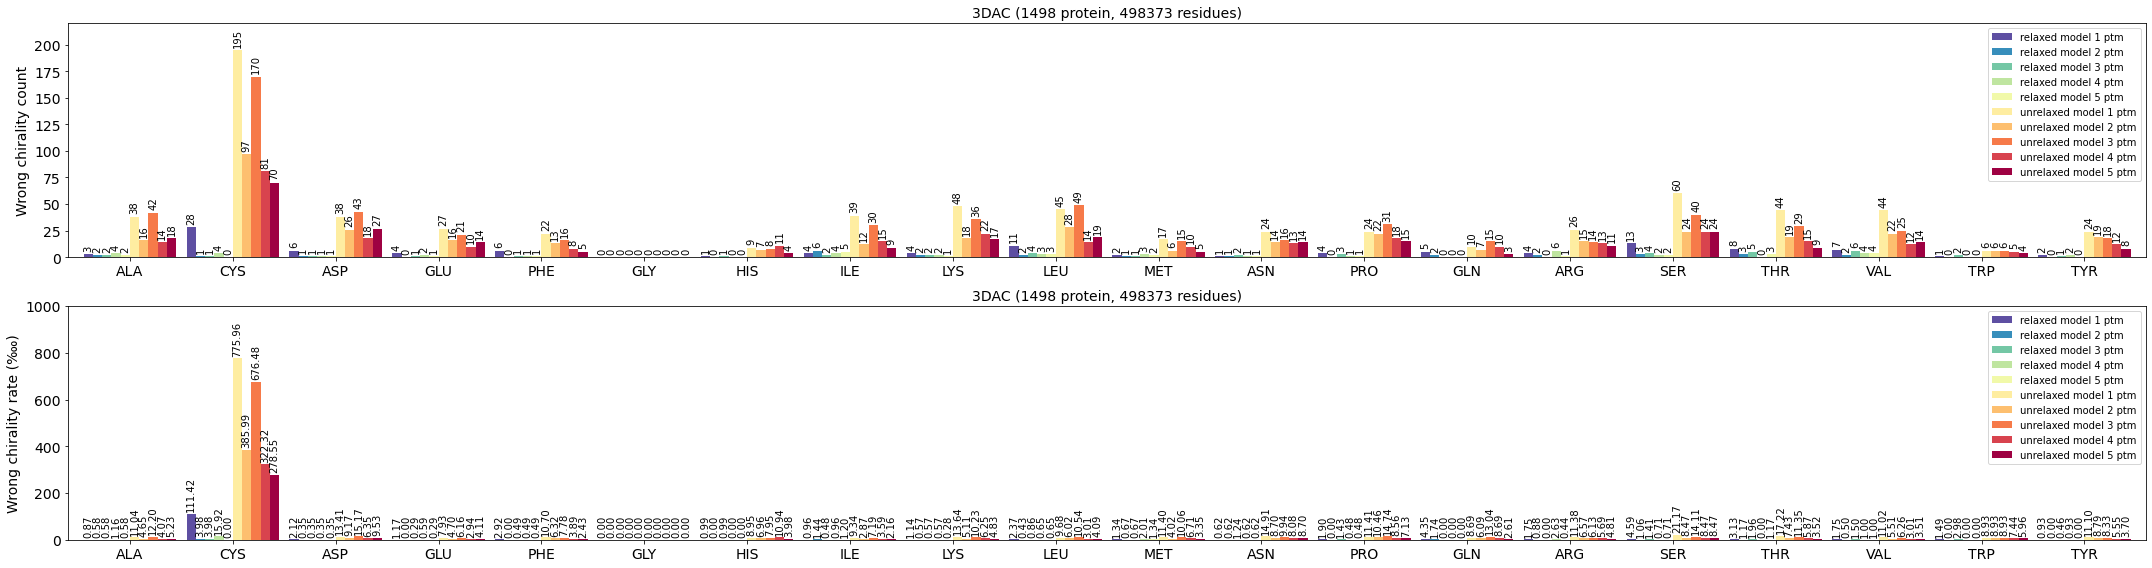

In [198]:
color_list = [plt.cm.Spectral_r(i) for i in np.linspace(0,1,10)]
model_names = ["relaxed model 1 ptm","relaxed model 2 ptm","relaxed model 3 ptm","relaxed model 4 ptm","relaxed model 5 ptm","unrelaxed model 1 ptm","unrelaxed model 2 ptm","unrelaxed model 3 ptm","unrelaxed model 4 ptm","unrelaxed model 5 ptm"]


plt.figure(figsize=(30,8))
plt.subplot(211)
for model_index in range(10):
    wrong_chirality_count = [residue[0] for residue in chirality_result_3DAC[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+3,str(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("3DAC (1498 protein, 498373 residues)",fontsize=14)
plt.ylabel("Wrong chirality count",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,220)
plt.legend(fontsize=10)


plt.subplot(212)
for model_index in range(10):
    wrong_chirality_count = [residue[0]/residue[1]*10000 for residue in chirality_result_3DAC[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+10,"%.2f"%(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("3DAC (1498 protein, 498373 residues)",fontsize=14)
plt.ylabel("Wrong chirality rate (‱)",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,1000)
plt.legend(fontsize=10)


plt.tight_layout()
plt.savefig("3DAC_chirality.png",dpi=300,bbox_inches="tight")

In [187]:
chirality_result_A501_after_filter = [[],[],[],[],[],[],[],[],[],[]]
df_A501_after_filter = df_A501[filter_function(df_A501)].reset_index(drop=True)
chirality_result_A501_after_filter[0] = count_wrong_chirality(df_A501_after_filter,"relaxed_model_1_ptm")
chirality_result_A501_after_filter[1] = count_wrong_chirality(df_A501_after_filter,"relaxed_model_2_ptm")
chirality_result_A501_after_filter[2] = count_wrong_chirality(df_A501_after_filter,"relaxed_model_3_ptm")
chirality_result_A501_after_filter[3] = count_wrong_chirality(df_A501_after_filter,"relaxed_model_4_ptm")
chirality_result_A501_after_filter[4] = count_wrong_chirality(df_A501_after_filter,"relaxed_model_5_ptm")
chirality_result_A501_after_filter[5] = count_wrong_chirality(df_A501_after_filter,"unrelaxed_model_1_ptm")
chirality_result_A501_after_filter[6] = count_wrong_chirality(df_A501_after_filter,"unrelaxed_model_2_ptm")
chirality_result_A501_after_filter[7] = count_wrong_chirality(df_A501_after_filter,"unrelaxed_model_3_ptm")
chirality_result_A501_after_filter[8] = count_wrong_chirality(df_A501_after_filter,"unrelaxed_model_4_ptm")
chirality_result_A501_after_filter[9] = count_wrong_chirality(df_A501_after_filter,"unrelaxed_model_5_ptm")

In [188]:
chirality_result_3DAC_after_filter = [[],[],[],[],[],[],[],[],[],[]]
df_3DAC_after_filter = df_3DAC[filter_function(df_3DAC)].reset_index(drop=True)
chirality_result_3DAC_after_filter[0] = count_wrong_chirality(df_3DAC_after_filter,"relaxed_model_1_ptm")
chirality_result_3DAC_after_filter[1] = count_wrong_chirality(df_3DAC_after_filter,"relaxed_model_2_ptm")
chirality_result_3DAC_after_filter[2] = count_wrong_chirality(df_3DAC_after_filter,"relaxed_model_3_ptm")
chirality_result_3DAC_after_filter[3] = count_wrong_chirality(df_3DAC_after_filter,"relaxed_model_4_ptm")
chirality_result_3DAC_after_filter[4] = count_wrong_chirality(df_3DAC_after_filter,"relaxed_model_5_ptm")
chirality_result_3DAC_after_filter[5] = count_wrong_chirality(df_3DAC_after_filter,"unrelaxed_model_1_ptm")
chirality_result_3DAC_after_filter[6] = count_wrong_chirality(df_3DAC_after_filter,"unrelaxed_model_2_ptm")
chirality_result_3DAC_after_filter[7] = count_wrong_chirality(df_3DAC_after_filter,"unrelaxed_model_3_ptm")
chirality_result_3DAC_after_filter[8] = count_wrong_chirality(df_3DAC_after_filter,"unrelaxed_model_4_ptm")
chirality_result_3DAC_after_filter[9] = count_wrong_chirality(df_3DAC_after_filter,"unrelaxed_model_5_ptm")

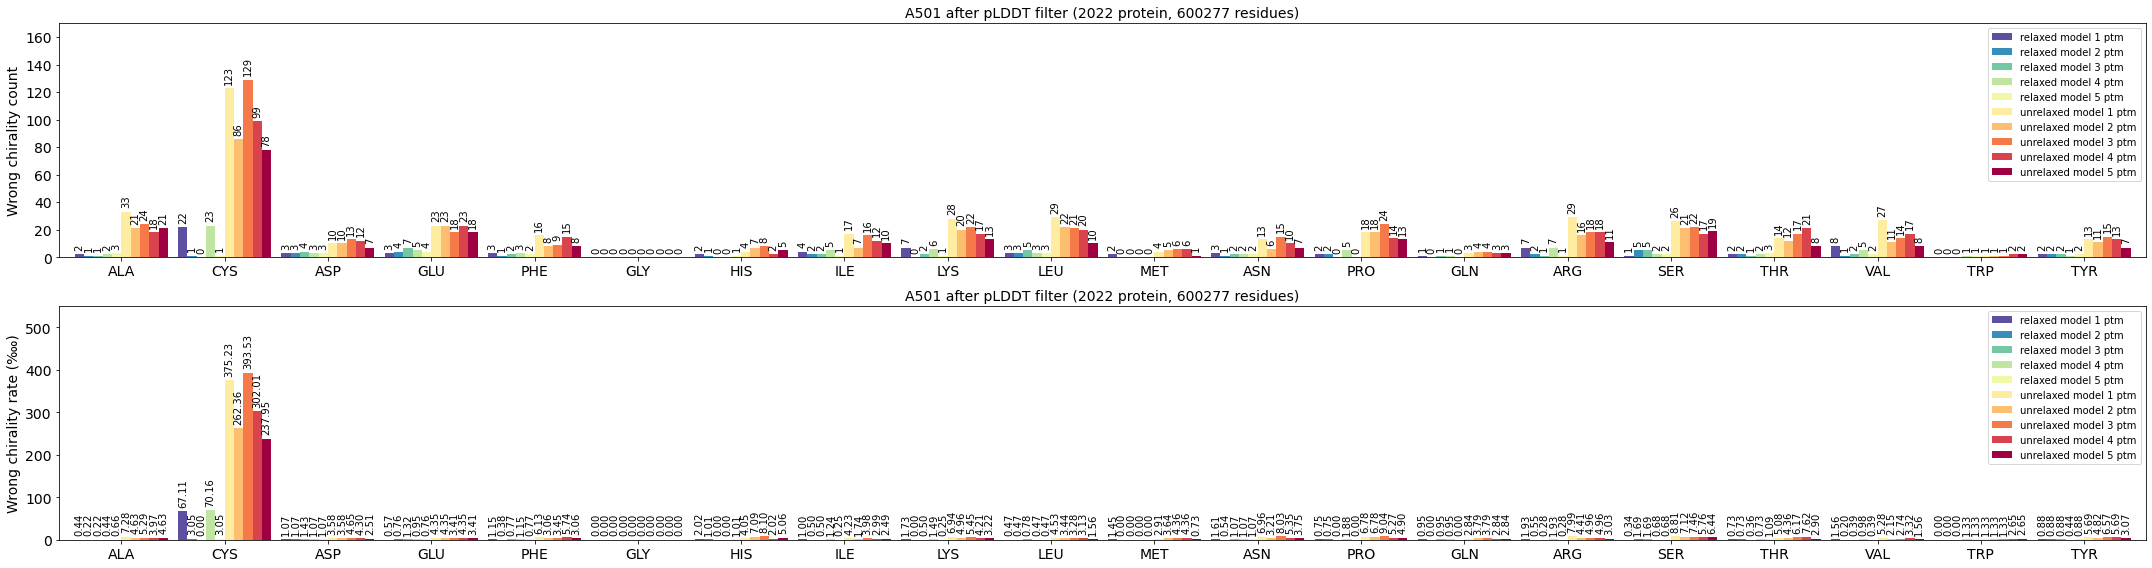

In [199]:
color_list = [plt.cm.Spectral_r(i) for i in np.linspace(0,1,10)]
model_names = ["relaxed model 1 ptm","relaxed model 2 ptm","relaxed model 3 ptm","relaxed model 4 ptm","relaxed model 5 ptm","unrelaxed model 1 ptm","unrelaxed model 2 ptm","unrelaxed model 3 ptm","unrelaxed model 4 ptm","unrelaxed model 5 ptm"]


plt.figure(figsize=(30,8))
plt.subplot(211)
for model_index in range(10):
    wrong_chirality_count = [residue[0] for residue in chirality_result_A501_after_filter[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+3,str(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("A501 after pLDDT filter (2022 protein, 600277 residues)",fontsize=14)
plt.ylabel("Wrong chirality count",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,170)
plt.legend(fontsize=10)


plt.subplot(212)
for model_index in range(10):
    wrong_chirality_count = [residue[0]/residue[1]*10000 for residue in chirality_result_A501_after_filter[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+10,"%.2f"%(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("A501 after pLDDT filter (2022 protein, 600277 residues)",fontsize=14)
plt.ylabel("Wrong chirality rate (‱)",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,550)
plt.legend(fontsize=10)


plt.tight_layout()
plt.savefig("A501_chirality_after_filter.png",dpi=300,bbox_inches="tight")

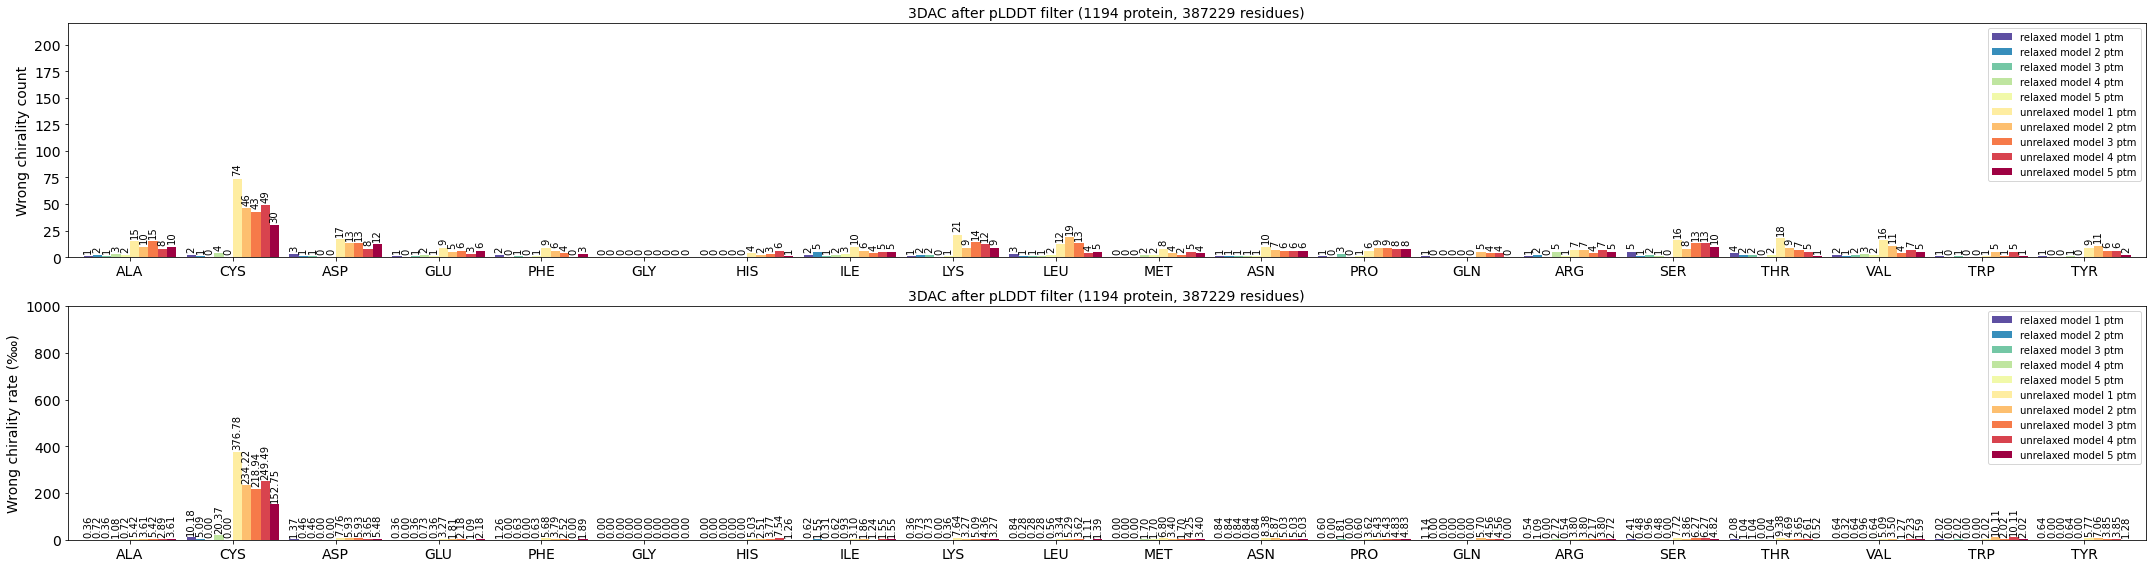

In [201]:
color_list = [plt.cm.Spectral_r(i) for i in np.linspace(0,1,10)]
model_names = ["relaxed model 1 ptm","relaxed model 2 ptm","relaxed model 3 ptm","relaxed model 4 ptm","relaxed model 5 ptm","unrelaxed model 1 ptm","unrelaxed model 2 ptm","unrelaxed model 3 ptm","unrelaxed model 4 ptm","unrelaxed model 5 ptm"]


plt.figure(figsize=(30,8))
plt.subplot(211)
for model_index in range(10):
    wrong_chirality_count = [residue[0] for residue in chirality_result_3DAC_after_filter[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+3,str(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("3DAC after pLDDT filter (1194 protein, 387229 residues)",fontsize=14)
plt.ylabel("Wrong chirality count",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,220)
plt.legend(fontsize=10)


plt.subplot(212)
for model_index in range(10):
    wrong_chirality_count = [residue[0]/residue[1]*10000 for residue in chirality_result_3DAC_after_filter[model_index]]
    plt.bar(np.arange(20)+model_index*0.09,wrong_chirality_count,width=0.09,color=color_list[model_index],label=model_names[model_index])
    for i in range(20):
        plt.text(i+model_index*0.09,wrong_chirality_count[i]+10,"%.2f"%(wrong_chirality_count[i]),ha="center",va="bottom",fontsize=10,rotation=90)
plt.xlim(-0.2,20)
plt.xticks(np.arange(20)+0.405,aa_list,fontsize=14)
plt.title("3DAC after pLDDT filter (1194 protein, 387229 residues)",fontsize=14)
plt.ylabel("Wrong chirality rate (‱)",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,1000)
plt.legend(fontsize=10)


plt.tight_layout()
plt.savefig("3DAC_chirality_after_filter.png",dpi=300,bbox_inches="tight")